From http://dcs.gla.ac.uk/~richardm/TREC_IS/ download the following:
1. All **crisis.csv** files to a new folder 'TREC/crisis_data'
2. Labeled file **trec_final_training.csv** to the 'TREC' folder

In [48]:
import os
import pandas as pd
from preprocess import *
from os.path import isfile, join
from IPython.display import Image

In [34]:
crisis_folder = 'crisis_data'
files = [f for f in os.listdir(crisis_folder) if os.path.isfile(join(crisis_folder,f))]
files = [file for file in files if '.csv' in file and file[0].isalpha()]
print(files)

['albertaFloods2013.csv', 'australiaBushfire2013.csv', 'bostonBombings2013.csv', 'chileEarthquake2014.csv', 'flSchoolShooting2018.csv', 'guatemalaEarthquake2012.csv', 'italyEarthquakes2012.csv', 'joplinTornado2011.csv', 'manilaFloods2013.csv', 'nepalEarthquake2015.csv', 'parisAttacks2015.csv', 'philipinnesFloods2012.csv', 'queenslandFloods2013.csv', 'typhoonHagupit2014.csv', 'typhoonYolanda2013.csv']


**Result**: ['albertaFloods2013.csv',
 'australiaBushfire2013.csv',
 'bostonBombings2013.csv',
 'chileEarthquake2014.csv',
 'flSchoolShooting2018.csv',
 'guatemalaEarthquake2012.csv',
 'italyEarthquakes2012.csv',
 'joplinTornado2011.csv',
 'manilaFloods2013.csv',
 'nepalEarthquake2015.csv',
 'parisAttacks2015.csv',
 'philipinnesFloods2012.csv',
 'queenslandFloods2013.csv',
 'typhoonHagupit2014.csv',
 'typhoonYolanda2013.csv']

## Create Unlabeled Domain Data

In [15]:
domains_folder = "domains_unlabeled" # create new folder
if not os.path.exists(domains_folder):
    os.makedirs(domains_folder)
for file in files:
    df = pd.DataFrame(pd.read_csv(join(crisis_folder,file), sep=',', encoding = "ISO-8859-1", index_col=0))
    tweets = list(df['text'])
    fname = ""
    for c in file:
        if c.isalpha():
            fname += c
        else:
            break
    f = open(join(domains_folder,fname), 'w+')
    for tweet in tweets:
        f.write(full_preprocess(tweet).strip()+'\n')  # preprocess the sentence; see preprocess.py
    f.close()    

**Result**: The folder named '*domains_unlabeled*' will be generated. This consists of unlabeled data for each domain with one processed tweet per line.

## Create Labeled Data

In [35]:
df = pd.DataFrame(pd.read_csv('trec_final_training.csv', sep=',', encoding = "ISO-8859-1", index_col=0))

In [36]:
df.columns

Index(['time', 'id', 'categories', 'indicators', 'priority', 'crisis',
       'created_at', 'text'],
      dtype='object')

**Result**: ['time', 'id', 'categories', 'indicators', 'priority', 'crisis','created_at', 'text']

In [37]:
files = [file[:-4] for file in files] #remove csv extension

In [38]:
files

['albertaFloods2013',
 'australiaBushfire2013',
 'bostonBombings2013',
 'chileEarthquake2014',
 'flSchoolShooting2018',
 'guatemalaEarthquake2012',
 'italyEarthquakes2012',
 'joplinTornado2011',
 'manilaFloods2013',
 'nepalEarthquake2015',
 'parisAttacks2015',
 'philipinnesFloods2012',
 'queenslandFloods2013',
 'typhoonHagupit2014',
 'typhoonYolanda2013']

**Result**: ['albertaFloods',
 'australiaBushfire',
 'bostonBombings',
 'chileEarthquake',
 'flSchoolShooting',
 'guatemalaEarthquake',
 'italyEarthquakes',
 'joplinTornado',
 'manilaFloods',
 'nepalEarthquake',
 'parisAttacks',
 'philipinnesFloods',
 'queenslandFloods',
 'typhoonHagupit',
 'typhoonYolanda']

### Priority Folder

In [39]:
folder = 'TASKS/priority/'
if not os.path.exists(folder):
    os.makedirs(folder)
for f in files:
    # negative
    dfx = df.loc[(df['priority'] == "Low") & (df['crisis'] == str(f).strip())]
    tweets = list(dfx['text'])
    tweets = [full_preprocess(tweet) for tweet in tweets]
    dirc = folder + str(f)[:-4]
    if not os.path.exists(dirc):
        os.makedirs(dirc)
    fnew = open(dirc+'/neg','w+')
    for tweet in tweets:
        if tweet.strip() != "":
            fnew.write(tweet.strip()+'\n')
    fnew.close()
    # positive
    dfx = df.loc[(df['priority'] != "Low") & (df['crisis'] == str(f).strip())]
    tweets = list(dfx['text'])
    tweets = [full_preprocess(tweet) for tweet in tweets]
    dirc = folder + str(f)[:-4]
    if not os.path.exists(dirc):
        os.makedirs(dirc)
    fnew = open(dirc+'/pos','w+')
    for tweet in tweets:
        if tweet.strip() != "":
            fnew.write(tweet.strip()+'\n')
    fnew.close()

**Result**: Creates 'pos' and 'neg' files in each crisis folder in 'TASKS/priority'

### Rest of the Tasks

In [41]:
tasks = ['Factoid', 'Sentiment', 'Irrelevant']

Rest of the tasks do not have a dedicated column like '*priority*'. We have to identify their labels from the '*categories*' column.

**Construct new dataframe with independent columns for the tasks needed**

In [43]:
cats = set() # Set of all labels
for index, row in df.iterrows():
    cat_values = row['categories'][1:-1].split('", "')
    for cv in cat_values:
        cats.add(cv)
cats = list(cats)
print(cats)

['Volunteer', 'Discussion', 'GoodsServices', 'Advice', 'CleanUp', 'MultimediaShare', 'Sentiment', 'ContinuingNews', 'ServiceAvailable', 'Unknown', 'InformationWanted', 'Irrelevant', 'KnownAlready', 'FirstPartyObservation', 'EmergingThreats', 'SearchAndRescue', 'ThirdPartyObservation', 'PastNews', 'Weather', 'SignificantEventChange', 'MovePeople', 'Donations', 'Factoid', 'Official', 'Hashtags']


**Result**: ['Volunteer', 'Discussion', 'GoodsServices', 'Advice', 'CleanUp', 'MultimediaShare', 'Sentiment', 'ContinuingNews', 'ServiceAvailable', 'Unknown', 'InformationWanted', 'Irrelevant', 'KnownAlready', 'FirstPartyObservation', 'EmergingThreats', 'SearchAndRescue', 'ThirdPartyObservation', 'PastNews', 'Weather', 'SignificantEventChange', 'MovePeople', 'Donations', 'Factoid', 'Official', 'Hashtags']

In [45]:
# Construct columns for each task and label them 0 or 1
df_trec = df
for cat in cats:
    df_trec[cat] = 0
for index, row in df_trec.iterrows():
    cat_values = row['categories'][1:-1].split('", "')
    for cv in cat_values:
        df_trec.at[index, cv] = 1
print(df_trec.columns)

Index(['time', 'id', 'categories', 'indicators', 'priority', 'crisis',
       'created_at', 'text', 'Volunteer', 'Discussion', 'GoodsServices',
       'Advice', 'CleanUp', 'MultimediaShare', 'Sentiment', 'ContinuingNews',
       'ServiceAvailable', 'Unknown', 'InformationWanted', 'Irrelevant',
       'KnownAlready', 'FirstPartyObservation', 'EmergingThreats',
       'SearchAndRescue', 'ThirdPartyObservation', 'PastNews', 'Weather',
       'SignificantEventChange', 'MovePeople', 'Donations', 'Factoid',
       'Official', 'Hashtags'],
      dtype='object')


**Result**: ['time', 'id', 'categories', 'indicators', 'priority', 'crisis',
       'created_at', 'text', 'Volunteer', 'Discussion', 'GoodsServices',
       'Advice', 'CleanUp', 'MultimediaShare', 'Sentiment', 'ContinuingNews',
       'ServiceAvailable', 'Unknown', 'InformationWanted', 'Irrelevant',
       'KnownAlready', 'FirstPartyObservation', 'EmergingThreats',
       'SearchAndRescue', 'ThirdPartyObservation', 'PastNews', 'Weather',
       'SignificantEventChange', 'MovePeople', 'Donations', 'Factoid',
       'Official', 'Hashtags']

**Create Task Folders**

In [47]:
for task in tasks:
    main_dirc = "TASKS/"+task
    if not os.path.exists(main_dirc):
        os.makedirs(main_dirc)
    for f in files:
        # negative
        dfx = df.loc[(df[task] == 0) & (df['crisis'] == str(f).strip())]
        tweets = list(dfx['text'])
        tweets = [full_preprocess(tweet) for tweet in tweets]
        dirc = main_dirc +"/" + str(f)[:-4]
        if not os.path.exists(dirc):
            os.makedirs(dirc)
        fnew = open(dirc+'/neg','w+')
        for tweet in tweets:
            if tweet.strip() != "":
                fnew.write(tweet.strip()+'\n')
        fnew.close()
        # positive
        dfx = df.loc[(df[task] == 1) & (df['crisis'] == str(f).strip())]
        tweets = list(dfx['text'])
        tweets = [full_preprocess(tweet) for tweet in tweets]
        dirc = main_dirc +"/" + str(f)[:-4]
        if not os.path.exists(dirc):
            os.makedirs(dirc)
        fnew = open(dirc+'/pos','w+')
        for tweet in tweets:
            if tweet.strip() != "":
                fnew.write(tweet.strip()+'\n')
        fnew.close()

### Final Result

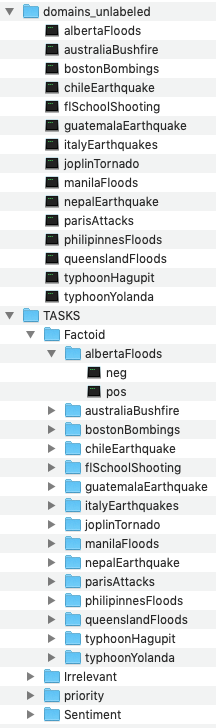

In [52]:
# An example of how the folders should look like
# All files are simply processed tweets per line
Image(filename='folders.png')